In [120]:
# Employee churning Prediction 

# Target Value =status

In [237]:
# Import Iimportatnt Libraries 


In [1]:
pwd

'C:\\Users\\USER\\Documents\\1.11 May 2023\\Project 23-06-2023\\Employee Churning Pedning'

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Importing the data 

In [3]:
df=pd.read_csv('employee_churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'employee_churn.csv'

In [ ]:
df.head()

In [ ]:
churn=df.copy()

In [286]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [287]:
churn.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


# We check null value 

In [288]:
churn.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [289]:
churn.shape

(14249, 10)

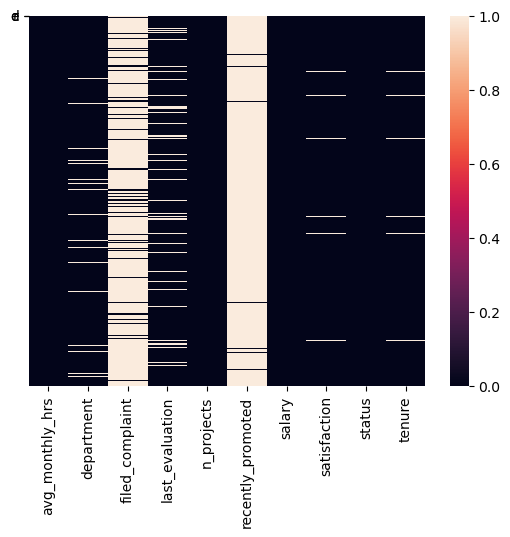

In [290]:
sns.heatmap(churn.isnull(),yticklabels='red') 
plt.show()

In [291]:
churn.isnull().sum()*100/len(churn)

avg_monthly_hrs       0.000000
department            4.975788
filed_complaint      85.556881
last_evaluation      10.751632
n_projects            0.000000
recently_promoted    97.894589
salary                0.000000
satisfaction          1.270265
status                0.000000
tenure                1.270265
dtype: float64

# we drop 2 Columns beacuse of large number of blanck  (filed_complaint,recently_promoted)

In [292]:
churn.drop(['filed_complaint','recently_promoted'],axis=1,inplace=True)

In [293]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_monthly_hrs  14249 non-null  int64  
 1   department       13540 non-null  object 
 2   last_evaluation  12717 non-null  float64
 3   n_projects       14249 non-null  int64  
 4   salary           14249 non-null  object 
 5   satisfaction     14068 non-null  float64
 6   status           14249 non-null  object 
 7   tenure           14068 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 890.7+ KB


# We fill null value mean, medium, mode 

In [294]:
churn['department']=churn['department'].fillna(churn['department'].mode())
churn['last_evaluation']=churn['last_evaluation'].fillna(churn['last_evaluation'].mean())
churn['satisfaction']=churn['satisfaction'].fillna(churn['satisfaction'].mean())
churn['tenure']=churn['tenure'].fillna(churn['tenure'].mean())

In [295]:
churn.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,engineering,0.932868,4,low,0.829896,Left,5.0
1,232,support,0.718477,3,low,0.834544,Employed,2.0
2,184,sales,0.788830,3,medium,0.834988,Employed,3.0
3,206,sales,0.575688,4,low,0.424764,Employed,2.0
4,249,sales,0.845217,3,low,0.779043,Employed,3.0


In [296]:
churn_columns=churn.columns
churn_columns

Index(['avg_monthly_hrs', 'department', 'last_evaluation', 'n_projects',
       'salary', 'satisfaction', 'status', 'tenure'],
      dtype='object')

In [297]:
for column in churn_columns:
    print(f'{column}:{churn[column].unique()}')

avg_monthly_hrs:[221 232 184 206 249 140 121 150 215 269 147 188 191 290 253 258 151 252
 276 154 259 136 176 231 125 109 130 163  67 268 107 156 234 127 282 133
 270 132 126 139 308  70 274 278 185 263 260 224 135 245 203 235 187 165
 146 159 198 275 141 173 230 168 183 246 209 143 212 186 162 158 283 113
 214 181 251 219 170 207 241 167 161 271 310 257 229 211 248 266 103 160
 116 194 200 213 148 250 196 265 262 175 254 189 104 195 255 281 155 208
 280 137 242 153 233 179 239 172 201 222 228 124 129 142 238 152 111 180
 237 288 199 256 305 138 134 166 291 273 240 236 171 182 225 164  81 149
 272 193 120 145 243 223 261 298 227 204  71 267 115 226 304 177 244 287
 192 178 289 197 128 101 247 131 220 264 217 118 218 277 119 157 285 210
  96 106 174 309 284 114 202 190 144 286 117 169 100 279 122 307 306 292
  99 294 216  98 105  49 108 300 303 205  68 301  78 297  82 102  73 295
 123 296  80  76 293 112  97 299  52  66  69  87 302 110  72  74  84  90
  83  85  54  93  89  56  95  91  5

# You can see department has contain null value  so be drop the null value 

In [298]:
churn = churn.dropna(how='any',axis=0) 

In [299]:
churn.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,engineering,0.932868,4,low,0.829896,Left,5.0
1,232,support,0.718477,3,low,0.834544,Employed,2.0
2,184,sales,0.788830,3,medium,0.834988,Employed,3.0
3,206,sales,0.575688,4,low,0.424764,Employed,2.0
4,249,sales,0.845217,3,low,0.779043,Employed,3.0


# We check Ouliers 

In [300]:
churn.shape

(13540, 8)

<AxesSubplot:>

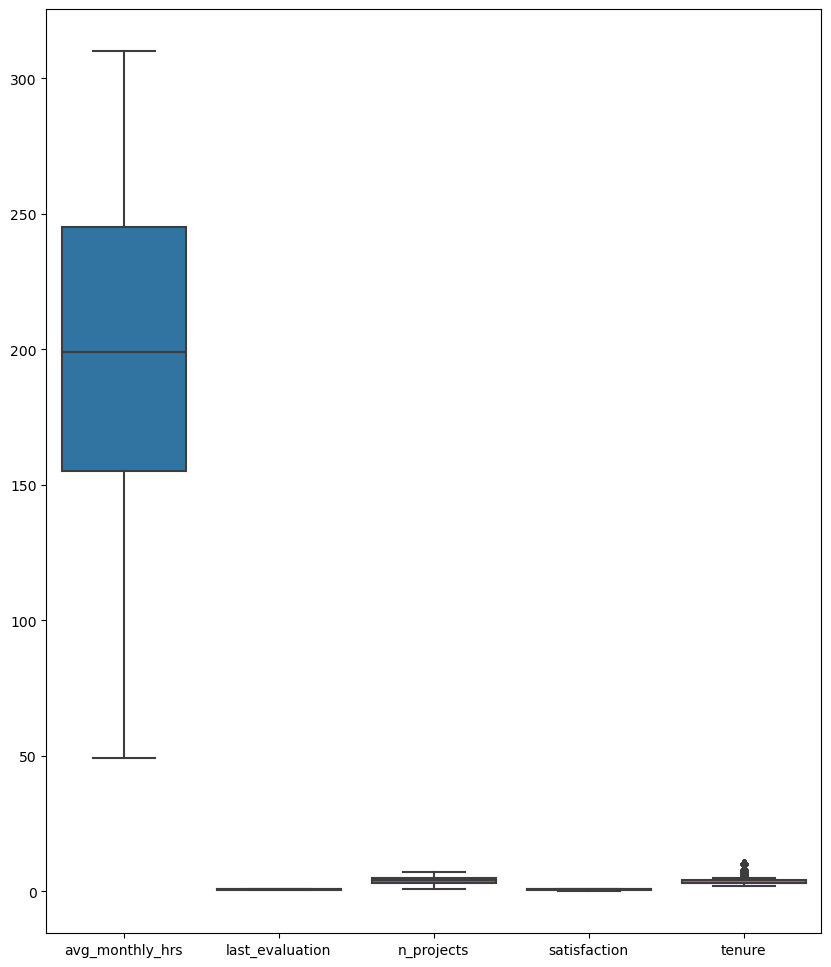

In [301]:
plt.figure(figsize=(10,12))
sns.boxplot(data=churn)

<AxesSubplot:>

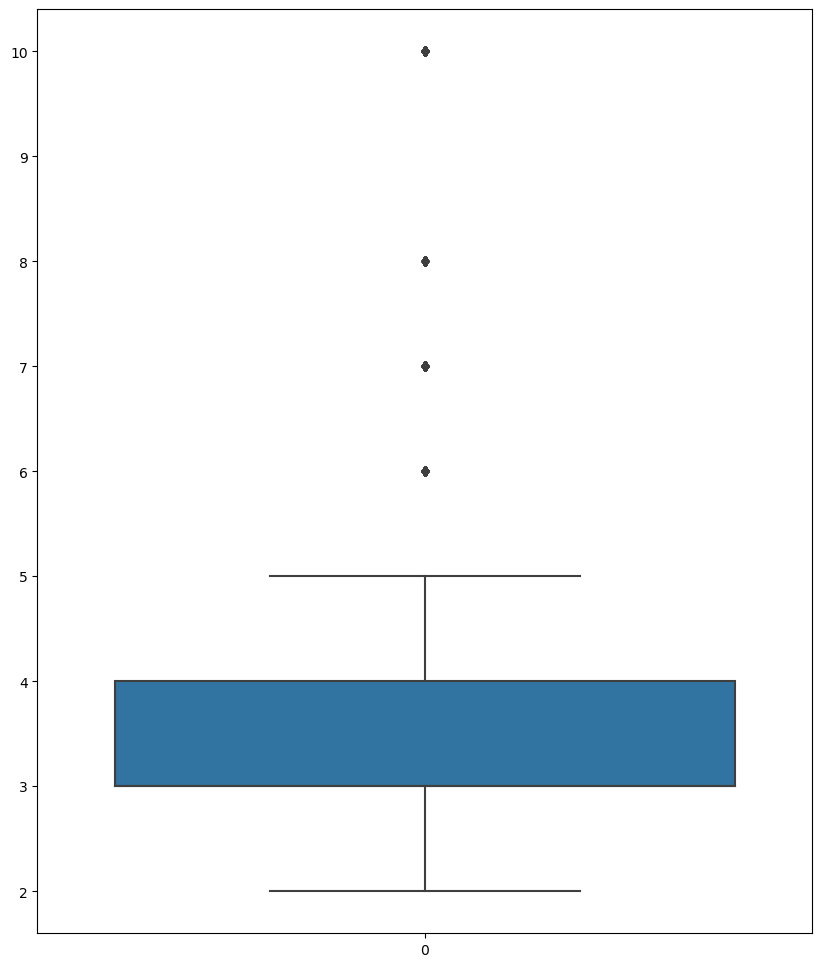

In [302]:
plt.figure(figsize=(10,12))
sns.boxplot(data=churn['tenure'])

In [303]:
churn.head(1)

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,engineering,0.932868,4,low,0.829896,Left,5.0


In [312]:
# we can't do label encoding with get dummies beacuse of EDA 

# Label Encoding 

In [313]:
churn['department'].replace({'sales':0,'engineering':1,'support':2,'IT':3,'product':4,'marketing':5,'finance':6,'management':7,'information_technology':8,'temp':9,'admin':10,'procurement':11},inplace=True)

In [314]:
churn['status'].replace({'Left':0,'Employed':1},inplace=True)
churn['salary'].replace({'low':0,'medium':1,'high':2},inplace=True)

In [315]:
churn['department'].value_counts()

0     3923
1     2592
2     2122
3     1161
4      860
5      819
6      728
7      595
8      209
9      181
10     176
11     174
Name: department, dtype: int64

In [316]:
churn

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,1,0.932868,4,0,0.829896,0,5.0
1,232,2,0.718477,3,0,0.834544,1,2.0
2,184,0,0.788830,3,1,0.834988,1,3.0
3,206,0,0.575688,4,0,0.424764,1,2.0
4,249,0,0.845217,3,0,0.779043,1,3.0
...,...,...,...,...,...,...,...,...
14243,272,1,0.815504,4,0,0.693387,1,2.0
14244,178,3,0.735865,5,0,0.263282,1,5.0
14245,257,0,0.638604,3,0,0.868209,1,2.0
14246,232,6,0.847623,5,1,0.898917,0,5.0


# EDA

<AxesSubplot:xlabel='status', ylabel='count'>

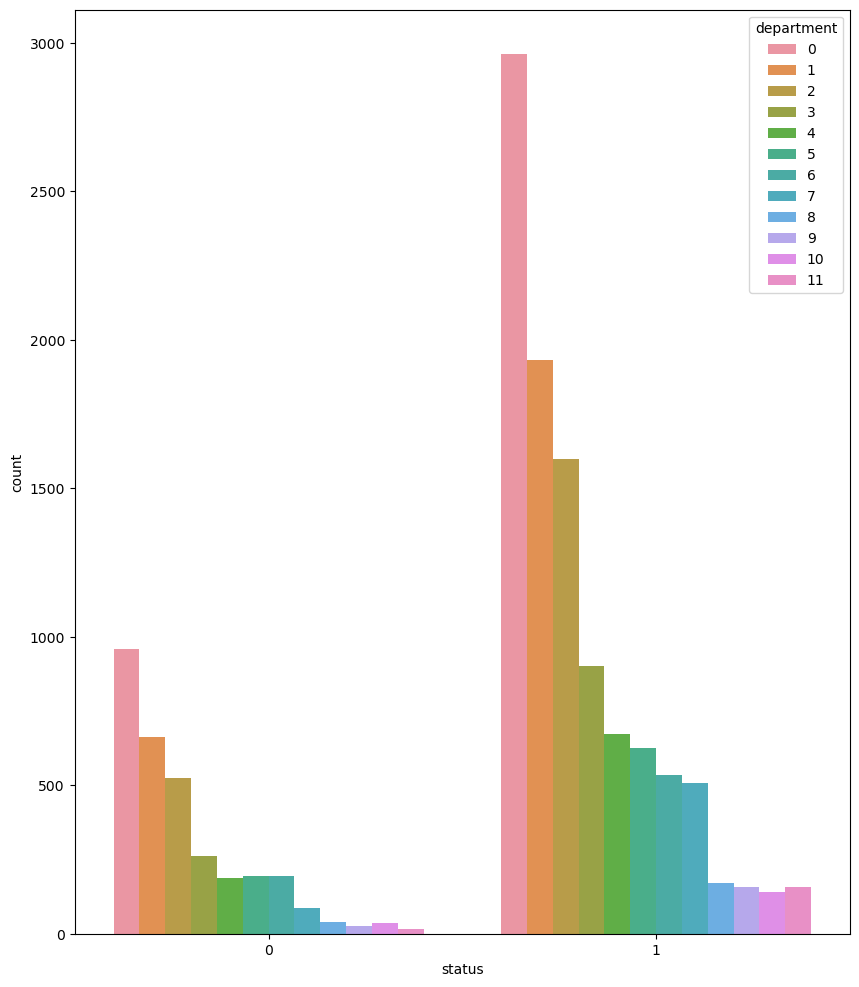

In [317]:
plt.figure(figsize=(10,12))
sns.countplot(data=churn,x='status',hue='department')

In [318]:
# Large Number of employee are left from sale department 

<AxesSubplot:xlabel='status', ylabel='count'>

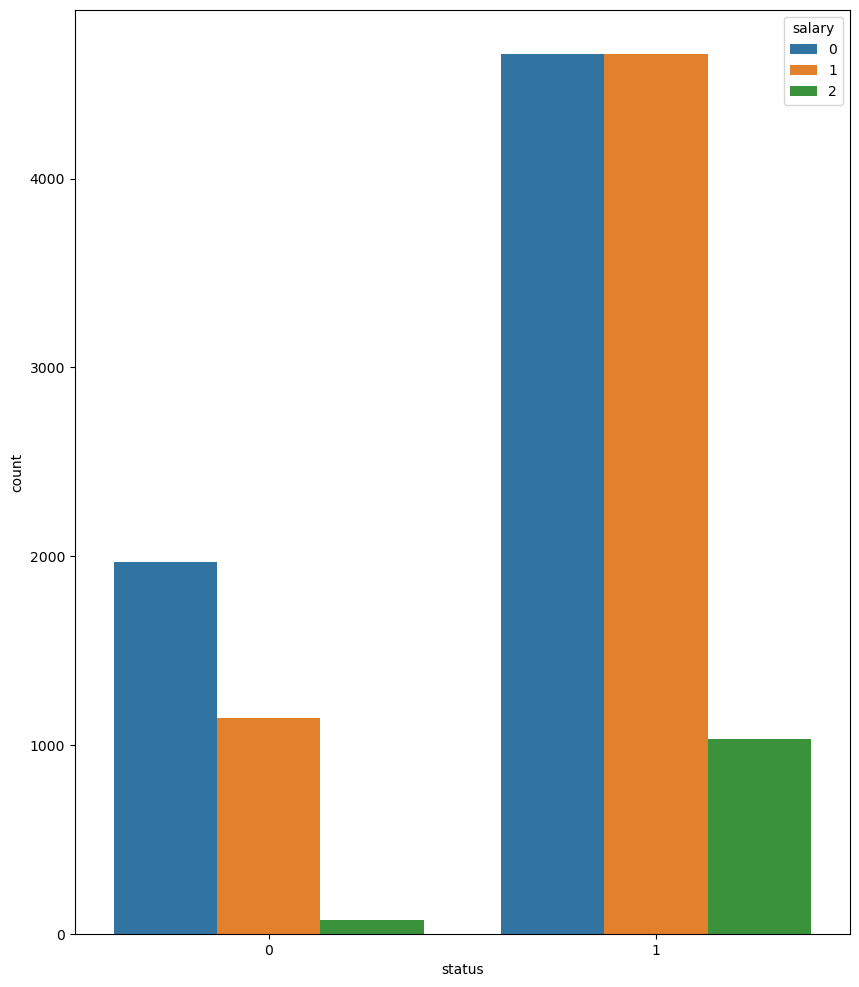

In [319]:
plt.figure(figsize=(10,12))
sns.countplot(data=churn,x='status',hue='salary')

In [320]:
# Large number of employe are left which salary is low and medium 

<AxesSubplot:xlabel='status', ylabel='salary'>

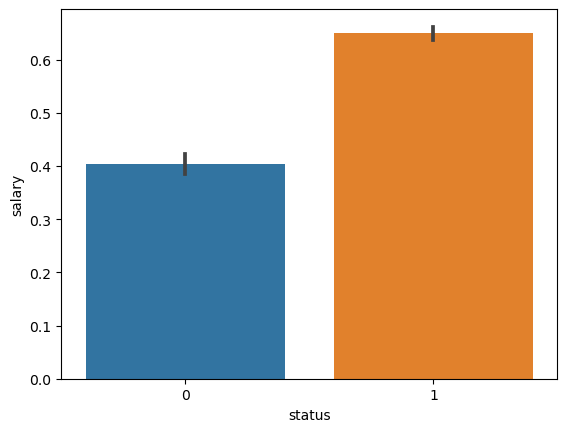

In [335]:
sns.barplot(data=churn,x='status',y='salary')

In [327]:
churn.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,1,0.932868,4,0,0.829896,0,5.0
1,232,2,0.718477,3,0,0.834544,1,2.0
2,184,0,0.788830,3,1,0.834988,1,3.0
3,206,0,0.575688,4,0,0.424764,1,2.0
4,249,0,0.845217,3,0,0.779043,1,3.0


<AxesSubplot:xlabel='status', ylabel='tenure'>

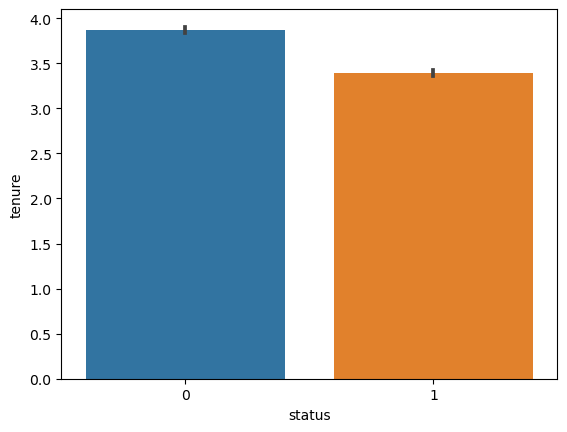

In [329]:
sns.barplot(data=churn,x='status',y='tenure')

<AxesSubplot:xlabel='status', ylabel='n_projects'>

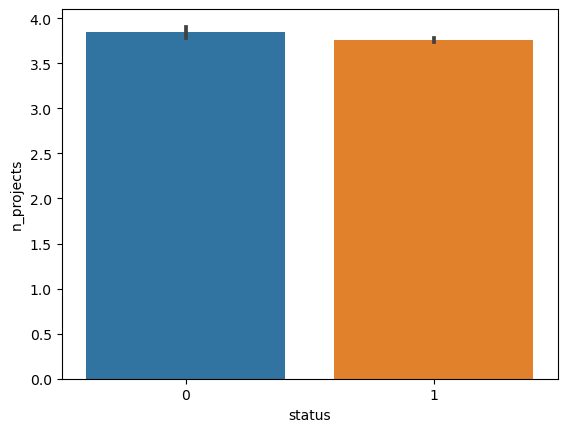

In [331]:
sns.barplot(data=churn,x='status',y='n_projects')

<AxesSubplot:xlabel='status', ylabel='satisfaction'>

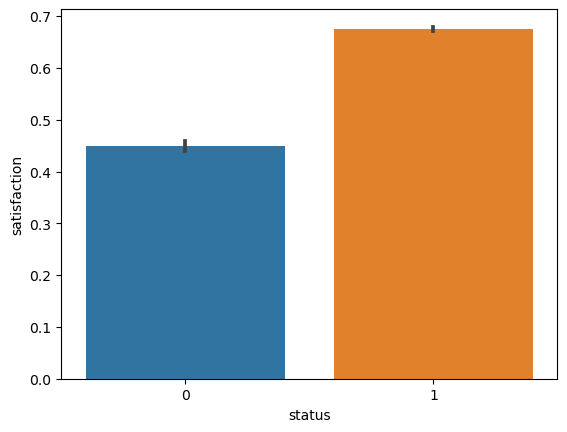

In [481]:
sns.barplot(data=churn,x='status',y='satisfaction')

<AxesSubplot:xlabel='status', ylabel='avg_monthly_hrs'>

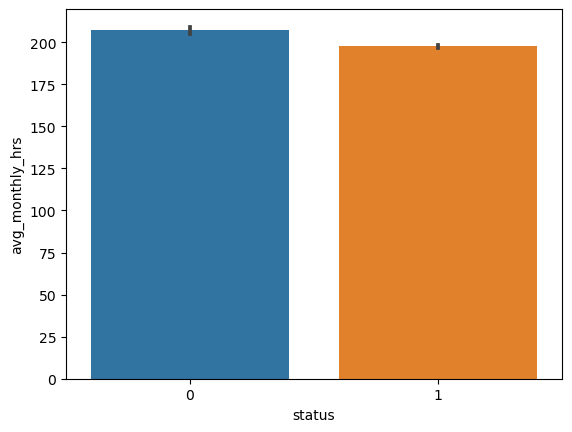

In [333]:
sns.barplot(data=churn,x='status',y='avg_monthly_hrs')

# Checking correlation 

In [338]:
corr=churn.corr() # Pearsons Method

In [337]:
corr

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
avg_monthly_hrs,1.000000,-0.069326,0.317572,0.440149,-0.002951,-0.019892,-0.078125,0.118130
department,-0.069326,1.000000,0.010782,-0.050304,0.083104,-0.004524,0.051575,0.034940
last_evaluation,0.317572,0.010782,1.000000,0.322499,-0.014966,0.082741,-0.043912,0.128004
n_projects,0.440149,-0.050304,0.322499,1.000000,-0.002760,-0.140817,-0.031216,0.185928
salary,-0.002951,0.083104,-0.014966,-0.002760,1.000000,0.056986,0.163781,0.049356
satisfaction,-0.019892,-0.004524,0.082741,-0.140817,0.056986,1.000000,0.385215,-0.093740
status,-0.078125,0.051575,-0.043912,-0.031216,0.163781,0.385215,1.000000,-0.139562
tenure,0.118130,0.034940,0.128004,0.185928,0.049356,-0.093740,-0.139562,1.000000


<AxesSubplot:>

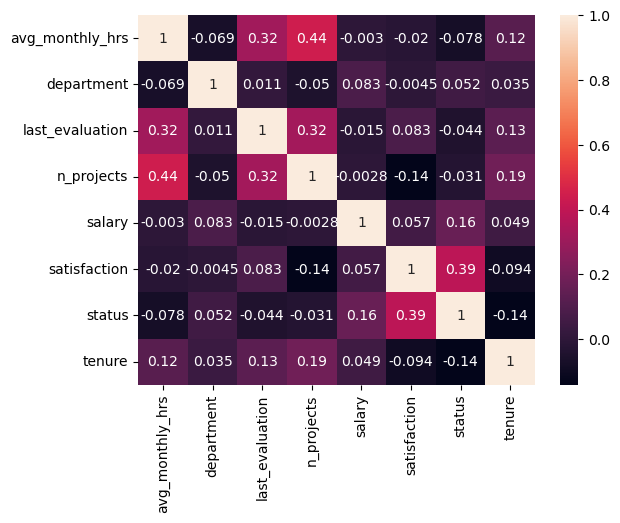

In [340]:
sns.heatmap(data=corr,annot=True)

In [341]:
# in this data we donot found high correlation 

In [342]:
churn.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,1,0.932868,4,0,0.829896,0,5.0
1,232,2,0.718477,3,0,0.834544,1,2.0
2,184,0,0.788830,3,1,0.834988,1,3.0
3,206,0,0.575688,4,0,0.424764,1,2.0
4,249,0,0.845217,3,0,0.779043,1,3.0


# Preprocessing 

In [350]:
X=churn.drop(['status'],axis=1)
Y=churn['status']

In [359]:
# We do scaling  in this dataset  because of avg hore contain >100 

In [360]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [361]:
scaler=StandardScaler()
scaler

StandardScaler()

In [362]:
X_scaled=scaler.fit_transform(X)

In [363]:
# Training Data and Testing Data 

In [369]:
Y.value_counts()

1    10354
0     3186
Name: status, dtype: int64

In [375]:
# You can see our data are inbalance  so we use statify 

In [376]:
from sklearn.model_selection import train_test_split

In [377]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=.20,stratify=Y)

In [379]:
# We check this data set from this all algorithum 

In [380]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# ensemble learning algorithm- bagging family
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [384]:
# Import evaluation function we need to import
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [472]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
sv=SVC()
gnb=GaussianNB()
dt=DecisionTreeClassifier()

In [473]:
for model in [lr,knn,sv,gnb,dt]:
    print('*************************************',model)
    abc=model.fit(X_train,Y_train)
    Y_predtrain=abc.predict(X_train)
    Y_predtest=abc.predict(X_test)
    Astrain=accuracy_score(Y_train,Y_predtrain)
    Astest=accuracy_score(Y_test,Y_predtest)
    cm=confusion_matrix(Y_test,Y_predtest)
    CR=classification_report(Y_test,Y_predtest)
    
    
    
    
    print("training Accuracy score \n" ,Astrain)
    print("=========="*3)
    print("testing Accuracy score \n" ,Astest)
    print("=========="*3)
    print("Confusion matrix \n" ,cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n" ,CR)
    print("=========="*3)
    #print("ROC AUC \n" ,ROC)
    print("=========="*3)

************************************* LogisticRegression()
training Accuracy score 
 0.7820347119645494
testing Accuracy score 
 0.7773264401772526
Confusion matrix 
 [[ 196  441]
 [ 162 1909]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.55      0.31      0.39       637
           1       0.81      0.92      0.86      2071

    accuracy                           0.78      2708
   macro avg       0.68      0.61      0.63      2708
weighted avg       0.75      0.78      0.75      2708

************************************* KNeighborsClassifier()


C:\Users\USER\.dotnet\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training Accuracy score 
 0.9549483013293943
testing Accuracy score 
 0.9324224519940916
Confusion matrix 
 [[ 570   67]
 [ 116 1955]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       637
           1       0.97      0.94      0.96      2071

    accuracy                           0.93      2708
   macro avg       0.90      0.92      0.91      2708
weighted avg       0.93      0.93      0.93      2708

************************************* SVC()
training Accuracy score 
 0.7850812407680945
testing Accuracy score 
 0.7854505169867061
Confusion matrix 
 [[  56  581]
 [   0 2071]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      0.09      0.16       637
           1       0.78      1.00      0.88      2071

    accuracy                           0.79      2708
   macro avg       0.89      0.54      0.52      2708
weighted avg       0.83      0.79      

In [474]:
# you can see in KNN and decision tree give good accuracy of training and test data
#so we do some changes in KNN and Decision tree

In [475]:
knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)

In [476]:
for model in [knn]:
    print('*************************************',model)
    abc=model.fit(X_train,Y_train)
    Y_predtrain=abc.predict(X_train)
    Y_predtest=abc.predict(X_test)
    Astrain=accuracy_score(Y_train,Y_predtrain)
    Astest=accuracy_score(Y_test,Y_predtest)
    cm=confusion_matrix(Y_test,Y_predtest)
    CR=classification_report(Y_test,Y_predtest)
    
    
    
    
    print("training Accuracy score \n" ,Astrain)
    print("=========="*3)
    print("testing Accuracy score \n" ,Astest)
    print("=========="*3)
    print("Confusion matrix \n" ,cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n" ,CR)
    print("=========="*3)
    #print("ROC AUC \n" ,ROC)
    print("=========="*3)

************************************* KNeighborsClassifier(n_neighbors=1)
training Accuracy score 
 0.9998153618906942
testing Accuracy score 
 0.9471935007385525
Confusion matrix 
 [[ 590   47]
 [  96 1975]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       637
           1       0.98      0.95      0.97      2071

    accuracy                           0.95      2708
   macro avg       0.92      0.94      0.93      2708
weighted avg       0.95      0.95      0.95      2708



In [425]:
# Now you can see in previous and new has emprove the accuracy of testing and traning 